# Объектно-ориентированный подход

**Matplotlib** — это библиотека Python, обладающая широкими возможностями для создания и отображения графической информации.

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_folder_path = './../../data'

df = pd.read_csv(os.path.join(data_folder_path, 'tips.csv'))
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Существует несколько подходов к созданию графиков в Matplotlib. Один из них — объектно-ориентированный подход, он наиболее прозрачный и мощный по функционалу. Процесс работы над графиком начинается с создания объекта, содержащего необходимую информацию и настройки. К этому объекту мы будем добавлять координатную плоскость и другие графические объекты.

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):

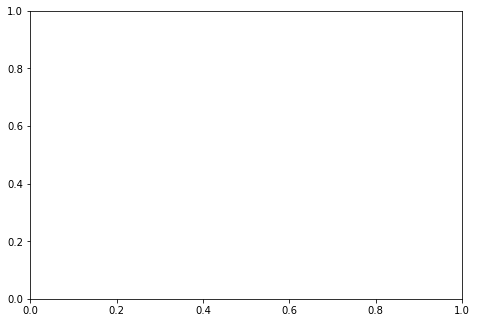

In [3]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])

Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод **hist**:

(array([ 7., 42., 68., 51., 31., 19., 12.,  7.,  3.,  4.]),
 array([ 3.07 ,  7.844, 12.618, 17.392, 22.166, 26.94 , 31.714, 36.488,
        41.262, 46.036, 50.81 ]),
 <a list of 10 Patch objects>)

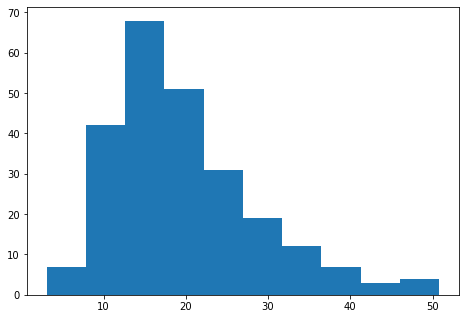

In [4]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'])

У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

- axes.set_title — заголовок диаграммы;
- axes.set_ylabel — заголовок для оси ординат;
- axes.set_xlabel — заголовок для оси абсцисс.

[Посмотрите](https://matplotlib.org/api/axes_api.html?highlight=axes#module-matplotlib.axes) полный список методов к объекту axes в официальной документации.

Text(0.5, 0, 'Сумма заказа, USD')

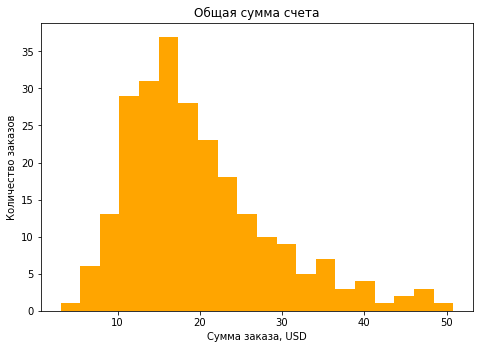

In [5]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins=20, color='orange')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Для размещения на координатной плоскости графиков других видов необходимо вызывать соответствующие методы применительно к объекту axes. Например, для создания **scatter plot**, отображающего связь между суммой счёта и размером чаевых, воспользуемся методом [scatter](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter):

Text(0, 0.5, 'Размер чаевых')

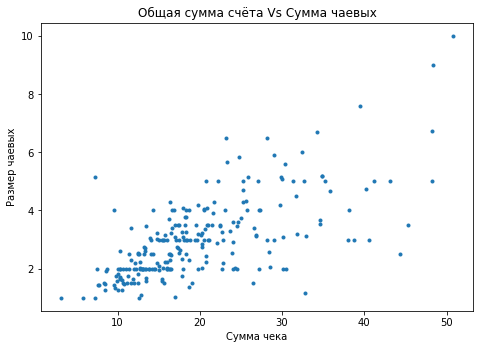

In [6]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=df['total_bill'], y=df['tip'], marker='.')
axes.set_title('Общая сумма счёта Vs Cумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

С помощью параметра marker можно настроить форму маркеров, используемых для отображения каждого индивидуального случая. [Посмотрите](https://matplotlib.org/api/markers_api.html#module-matplotlib.markers) другие варианты форм маркеров.

## Несколько систем координат

Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту **fig** метод **add_axes**, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это **отступ** слева и снизу, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

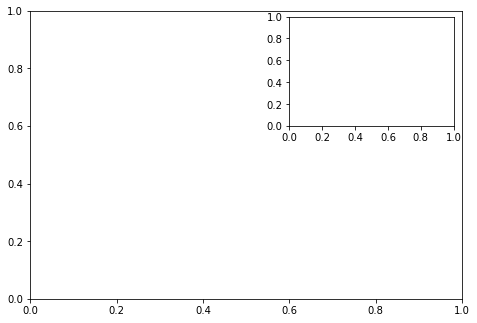

In [7]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insered_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

Работу по размещению двух графиков в одном объекте начнём с создания вспомогательного датафрейма, содержащего информацию о минимальной и максимальной сумме счёта по дням недели:

In [8]:
bills_per_day = df.groupby(by='day')['total_bill'].agg(['min', 'max']).reset_index()
bills_per_day

,day,min,max
0,Fri,5.75,40.17
1,Sat,3.07,50.81
2,Sun,7.25,48.17
3,Thur,7.51,43.11


Для размещения каждого графика применим соответствующий метод к объекту, представляющему нужную нам систему координат: 

- к объекту main_axes применим метод **hist**;
- для объекта insert_axes используем метод **bar**.

Для добавления в систему координат каждого типа столбцов мы отдельно применяем метод **bar**, указывая разные значения параметра **height**:

<BarContainer object of 4 artists>

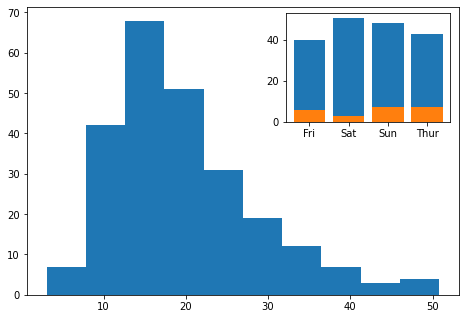

In [9]:
fig = plt.figure()

main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])

inserted_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
inserted_axes.bar(x=bills_per_day['day'], height=bills_per_day['max'])
inserted_axes.bar(x=bills_per_day['day'], height=bills_per_day['min'])

**Недостатком** графика является то, что на вспомогательной диаграмме столбцы перекрывают друг друга, из-за чего появляется риск потерять часть информации. Для решения этой проблемы поработаем с настройками метода bar.

Параметр **align** указывает, следует ли размещать столбцы для отображения каждого значения в центре или необходимо сместить их к краю. С помощью параметра **width** мы задаём ширину столбца в долях единицы относительно ширины всего пространства, выделенного для данного столбца. Отрицательное значение ширины позволит нам сдвинуть столбцы, отображающие данный параметр, в левую сторону:

<BarContainer object of 4 artists>

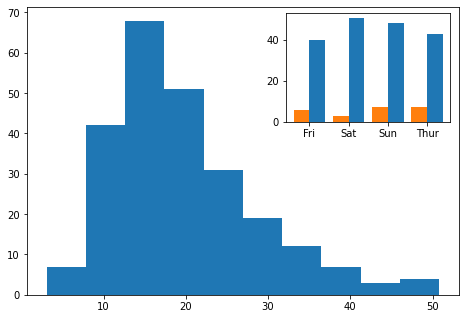

In [10]:
fig = plt.figure()

main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])

inserted_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
inserted_axes.bar(x=bills_per_day['day'], height=bills_per_day['max'], width=0.4, align='edge')
inserted_axes.bar(x=bills_per_day['day'], height=bills_per_day['min'], width=-0.4, align='edge')

## Добавление легенды

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр **label**. Место размещения легенды на координатной плоскости задаётся с помощью параметра **loc**:

In [11]:
bills_per_day = df.groupby(by='day')['total_bill'].agg(['min', 'max']).reset_index()

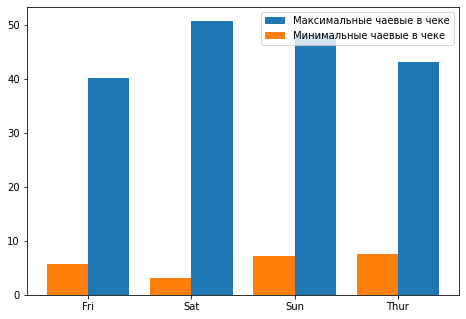

In [12]:
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])
axes.bar(x=bills_per_day['day'], height=bills_per_day['max'], width=0.4, align='edge', label='Максимальные чаевые в чеке')
axes.bar(x=bills_per_day['day'], height=bills_per_day['min'], width=-0.4, align='edge', label='Минимальные чаевые в чеке')
axes.legend(loc=1)

Для того, чтобы легенда не перекрывала часть данных, увеличиваем максимальное значение оси ординат с помощью метода **set_ylim** к объекту axes:

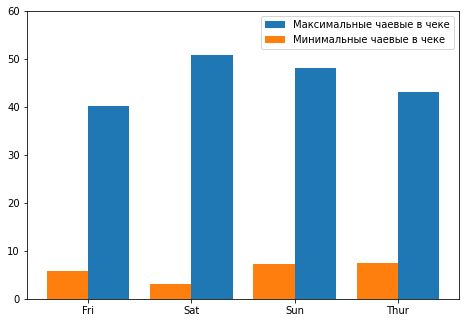

In [13]:
fig = plt.figure()

axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0, 60)
axes.bar(x=bills_per_day['day'], height=bills_per_day['max'], width=0.4, align='edge', label='Максимальные чаевые в чеке')
axes.bar(x=bills_per_day['day'], height=bills_per_day['min'], width=-0.4, align='edge', label='Минимальные чаевые в чеке')
axes.legend(loc=1)

## Subplots

Разместить в одном пространстве несколько графиков можно и с помощью метода [subplots](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html?highlight=subplots#matplotlib.figure.Figure.subplots). В параметрах фигуры необходимо указать количество строк и столбцов, в которых будут размещаться графики. При желании можно задать размер фигуры в дюймах (ширина*высота):

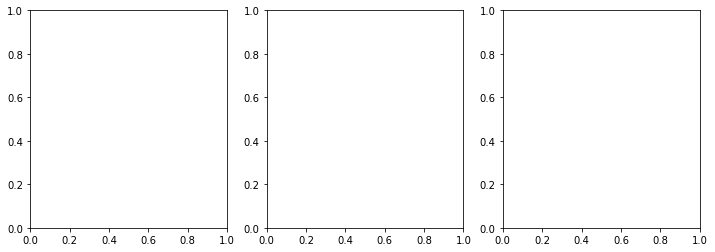

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

После выполнения кода переменная axes содержит список, состоящий из трех объектов. Обращаться к элементам списка можно по индексам (от 0 до 2):

Text(0.5, 1.0, 'Общая сумма счета VS Сумма чаевых')

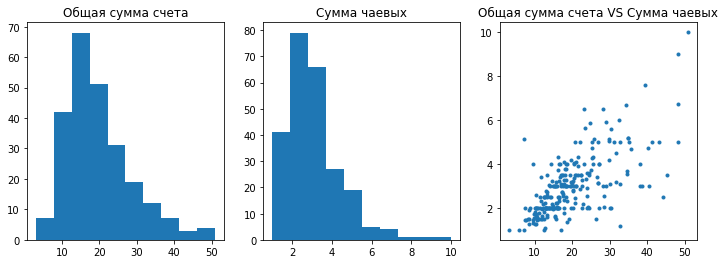

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))

axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df['total_bill'], y=df['tip'], marker='.')
axes[2].set_title('Общая сумма счета VS Сумма чаевых')

(array([41., 79., 66., 27., 19.,  5.,  4.,  1.,  1.,  1.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

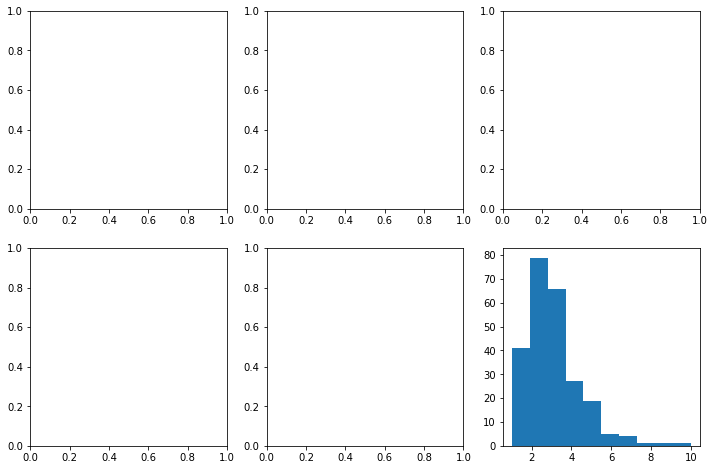

In [16]:
# 6 графиков, разместив их в 2 строки по 3 графика в каждом
fig, axes = plt.subplots(2, 3, figsize=(12,8))

axes[1][2].hist(df['tip'])

## Создание линейных графиков

In [17]:
x = np.linspace(start=-3, stop=3, num=1000)
y1 = np.exp(x)

### Отрисовка одной кривой
Функция [matplotlib.pyplot.plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) позволяет отрисовать последовательность значений. Первым аргументом подается последовательность чисел аргумента, вторым — последовательность значений функции для каждого аргумента:

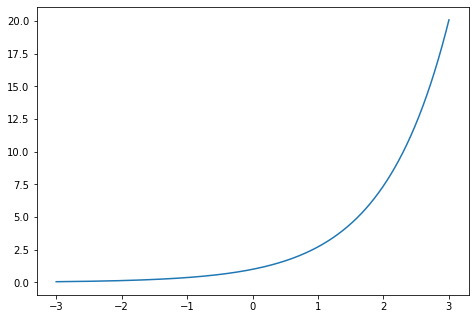

In [18]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1)

### Отрисовка нескольких кривых

Функцию plot можно вызвать несколько раз для отрисовки дополнительного контента. В таком случае отрисовка будет выполнена в том же matplotlib.pyplot.figure, который в данном случае создается автоматически при первой отрисовке. Для примера добавим к нашему графику какой-нибудь полином третьей степени:

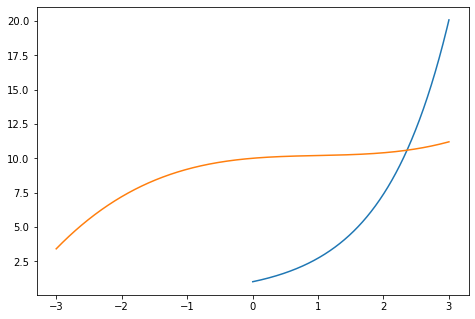

In [19]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x[500:], y1[500:]) 
axes.plot(x, y2)

Обратите внимание, полученным графикам назначены разные цвета. Эти цвета берутся из палитры по умолчанию и всегда назначаются в одном и том же порядке при добавлении новых графиков.

### Стили линий

Воспользуемся функцией [matplotlib.pyplot.figure](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html) для создания фигуры заданного размера. Размер фигуры задается в дюймах. При этом для отображения на реальном дисплее количество пикселей определяется за счет установленного dpi — dots per inch (по умолчанию 100).

При визуализации большого объема данных часто приходится выделять те или иные графики. Как и при написании текстов, это можно сделать с помощью форматирования. Форматирование линии определяется стилем отрисовки, маркировкой или и тем и другим одновременно. Описание возможных стилей и маркеров можно посмотреть в [документации](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

Отрисуем линию в стиле "dashed line":

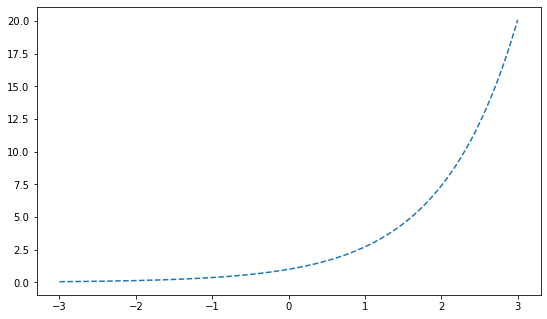

In [20]:
fig = plt.figure(figsize=(7,4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1, linestyle='--')

### Цвета и маркеры

Чтобы задать тип маркера и цвет линии, воспользуемся методом форматирования линии. Его структура — это строка, содержащая в полном виде символы, обозначающие цвет маркера, тип маркера и тип линии. Возможен пропуск любого количества из этих трёх параметров. Мы отрисуем линию в фиолетовом цвете ('m' — magenta) с маркером ромба ('D' — diamond marker):

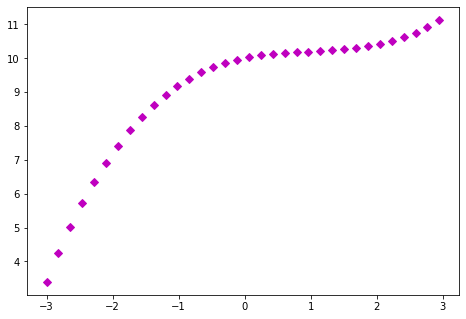

In [21]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[::30], y2[::30], 'mD')

Остальные цвета и маркеры можно посмотреть в [документации](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html).

#### Верно ли утверждение, что два первых аргумента функции matplotlib.pyplot.plot принимают списки одинаковой длины?
Ответ: **ДА**